In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_excel(r'C:\Users\Nikhil\Downloads\Customer_retention_dataset\Customer_retention_dataset\customer_retention_dataset.xlsx')

In [3]:
df

1Gender of respondent  age           city  \
0                        0    3          Delhi   
1                        1    2          Delhi   
2                        1    2  Greater Noida   
3                        0    2        Karnal    
4                        1    2     Bangalore    
..                     ...  ...            ...   
264                      1    2          Solan   
265                      1    3      Ghaziabad   
266                      1    4     Bangalore    
267                      1    1          Solan   
268                      1    4      Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

     5 Since How Long You are Shopping Online ?  \
0                                             5   
1                                             5   
2                                             4   
3                                             4   
4                                             3   
..                                          ...   
264                                           2   
265                                           2   
266                                           3   
267                                           3   
268                                           3   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    4                       
1                                                    5                       
2                                                    5                       
3                                                    1                       
4                                                    2                       
..                                                 ...                       
264                                                  1                       
265                                                  4                       
266                                                  1                       
267                                                  1                       
268                                                  4                       

     7 How do you access the internet while shopping on-line?  device  \
0                                                    4              3   
1                                                    2              1   
2                                                    3              1   
3                                                    3              1   
4                                                    2              1   
..                                                 ...            ...   
264                                                  3              1   
265                                                  3              1   
266                                                  3              2   
267                                                  2              1   
268                                                  3              1   

     9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                    5                                                      
1             

In [4]:
df.corr()

1Gender of respondent  \
1Gender of respondent                                            1.000000   
2 How old are you?                                              -0.034449   
4 What is the Pin Code of where you shop online...               0.260696   
5 Since How Long You are Shopping Online ?                      -0.046005   
6 How many times you have made an online purcha...               0.076121   
7 How do you access the internet while shopping...              -0.200974   
8 Which device do you use to access the online ...              -0.241847   
9 What is the screen size of your mobile device...              -0.058760   
10 What is the operating system (OS) of your de...              -0.038207   
11 What browser do you run on your device to ac...              -0.116712   
12 Which channel did you follow to arrive at yo...              -0.166694   
13 After first visit, how do you reach the onli...               0.104118   
14 How much time do you explore the e- retail s...               0.139327   
15 What is your preferred payment Option?\t\t\t...               0.049685   
16 How 4 do you abandon (selecting an items and...               0.090390   
17 Why did you abandon the “Bag”, “Shopping Car...              -0.024279   
18 The content on the website must be easy to r...               0.166977   
19 Information on similar product to the one hi...               0.260724   
20 Complete information on listed seller and pr...               0.079679   
21 All relevant information on listed products ...               0.143320   
22 Ease of navigation in website                                 0.167883   
23 Loading and processing speed                                  0.225080   
24 User friendly Interface of the website                        0.231970   
25 Convenient Payment methods                                    0.230923   
26 Trust that the online retail store will fulf...               0.177032   
27 Empathy (readiness to assist with queries) t...               0.105170   
28 Being able to guarantee the privacy of the c...               0.055174   
29 Responsiveness, availability of several comm...               0.029508   
30 Online shopping gives monetary benefit and d...               0.164411   
31 Enjoyment is derived from shopping online                     0.189852   
32 Shopping online is convenient and flexible                    0.234597   
33 Return and replacement policy of the e-taile...               0.183537   
34 Gaining access to loyalty programs is a bene...               0.113073   
35 Displaying quality Information on the websit...               0.285572   
36 User derive satisfaction while shopping on a...               0.178033   
37 Net Benefit derived from shopping online can...               0.347038   
38 User satisfaction cannot exist without trust                  0.097540   
39 Offering a wide variety of listed product in...               0.152595   
40 Provision of complete and relevant product i...               0.357061   
41 Monetary savings                                              0.201673   
42 The Convenience of patronizing the online re...               0.198382   
43 Shopping on the website gives you the sense ...              -0.005218   
44 Shopping on your preferred e-tailer enhances...              -0.046397   
45 You feel gratification shopping on your favo...               0.018482   
46 Shopping on the website helps you fulfill ce...              -0.113160   
47 Getting value for money spent                                 0.202014   

                                                    2 How old are you?   \
1Gender of respondent                                         -0.034449   
2 How old are you?                                             1.000000   
4 What is the Pin Code of where you shop online...            -0.057393   
5 Since How Long You are Shopping Online ?                     0.014049   
6 How many times you have made an online purcha...       

In [5]:
df.describe

<bound method NDFrame.describe of      1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
..                     ...                  ...   
264                      1                    2   
265                      1                    3   
266                      1                    4   
267                      1                    1   
268                      1                    4   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 So

In [6]:
df["3 Which city do you shop online from?"].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

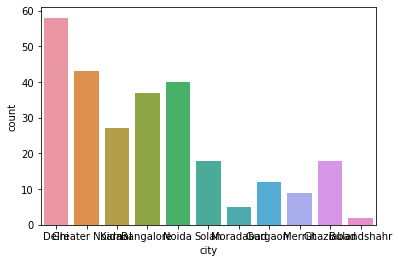

In [10]:
sns.countplot(df['city'])

In [7]:
df["1Gender of respondent"].value_counts()

1    180
0     89
Name: 1Gender of respondent, dtype: int64

In [4]:
import dtale

In [5]:
dtale.show(df)

2021-05-20 23:17:15,225 - INFO     - NumExpr defaulting to 8 threads.


Executing shutdown due to inactivity...


2021-05-21 00:17:41,958 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-05-21 00:17:46,177 - INFO     - Executing shutdown...


In [11]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

IndexError: list index out of range

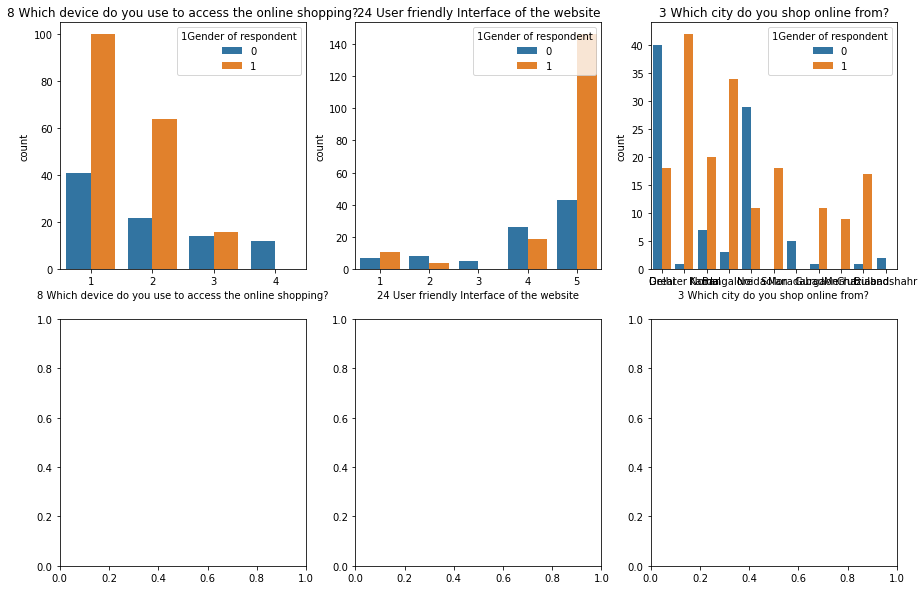

Executing shutdown due to inactivity...


2021-05-16 23:03:13,040 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-05-16 23:03:17,091 - INFO     - Executing shutdown...


In [18]:
cols = ['8 Which device do you use to access the online shopping?', '24 User friendly Interface of the website', '3 Which city do you shop online from?']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(df[cols[i]], hue=df["1Gender of respondent"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="1Gender of respondent", loc='upper right') 
        
plt.tight_layout()   #tight_layout

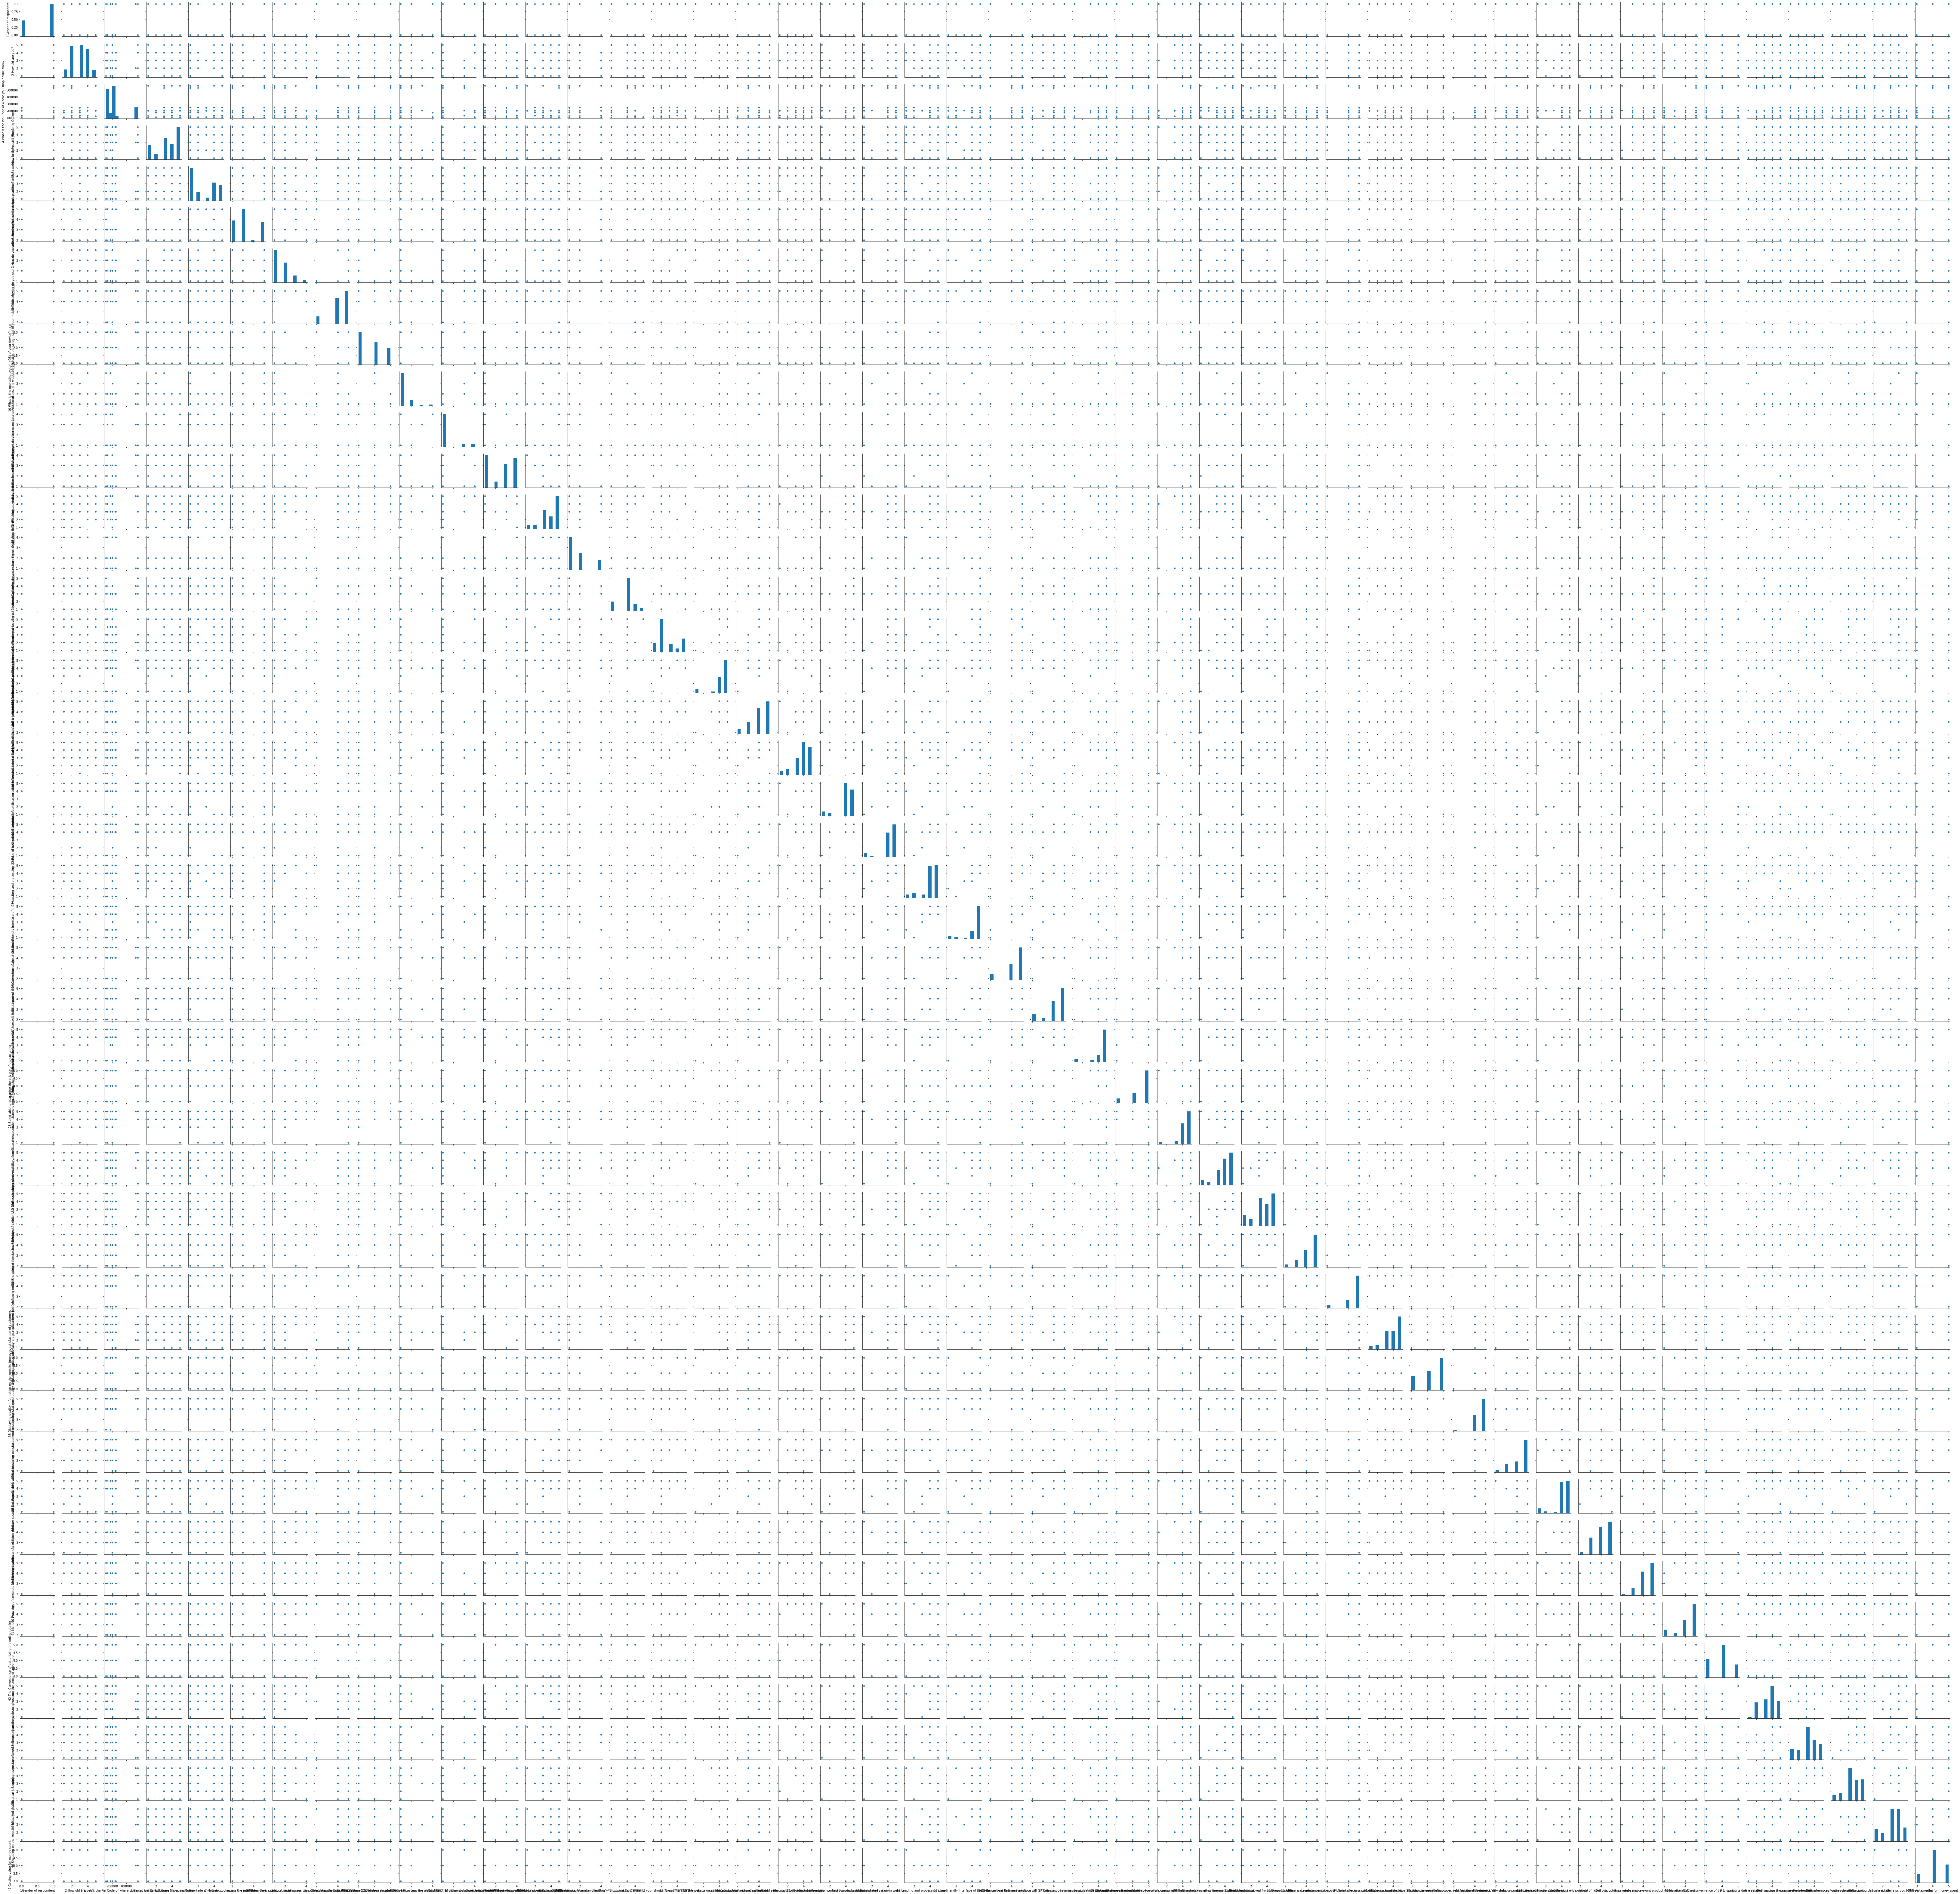

In [20]:
sns.pairplot(df)

In [21]:
pip install pandas-profiling

ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.


  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107421 sha256=574e0bf87cebedc0956fadb6ab6e64d530df50eddd53651e5744226d866e6dd0
  Stored in directory: c:\users\nikhil\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=881d02c8ea1e1862a120a2c614ba226dc6c32197e9c5f6e5801de761e7ffea1c
  Stored in directory: c:\users\nikhil\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.2
    Uninstalling typing-extensions-3.7.4.2:
      Successfully uninstalled typing-extensions-3.7.4.2


In [23]:
from pandas_profiling import ProfileReport

In [24]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [25]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/84 [00:00<?, ?it/s]

2021-05-17 00:53:09,627 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,627 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,627 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,627 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,627 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,630 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,631 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,631 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,632 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09

2021-05-17 00:53:09,752 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,753 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,754 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,755 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,755 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,756 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,757 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,758 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,758 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09

2021-05-17 00:53:09,815 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,816 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,817 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,818 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,819 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,820 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,820 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,863 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09,864 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:09

2021-05-17 00:53:10,029 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,030 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,031 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,032 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,033 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,034 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,035 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,036 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,036 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10

2021-05-17 00:53:10,091 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,092 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,093 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,094 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,094 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,095 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,096 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,097 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:10,097 - INFO     - Fontsize 0.78 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18

2021-05-17 00:53:18,229 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,229 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,230 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,231 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,231 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,232 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,232 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,233 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,233 - INFO     - Fontsize 0.62 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18

2021-05-17 00:53:18,277 - INFO     - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,278 - INFO     - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2021-05-17 00:53:18,278 - INFO     - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.5 in c:\users\nikhil\anaconda3\lib\site-packages (from python-dateutil>=2.7.3->pandas!=1.0.0,!=1.0.1,!=1.0.2,>=0.25.3->sweetviz) (1.15.0)



In [8]:
import sweetviz

In [9]:
my_report = sweetviz.analyze([df,'customer retention'])

                                             |                                             | [  0%]   00:00 ->…

In [10]:
my_report.show_html('Report1.html')

Report Report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


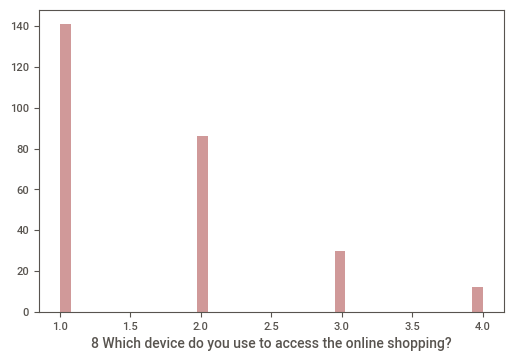

In [12]:
sns.distplot(df["8 Which device do you use to access the online shopping?"].dropna(),kde=False,color='darkred',bins=40)


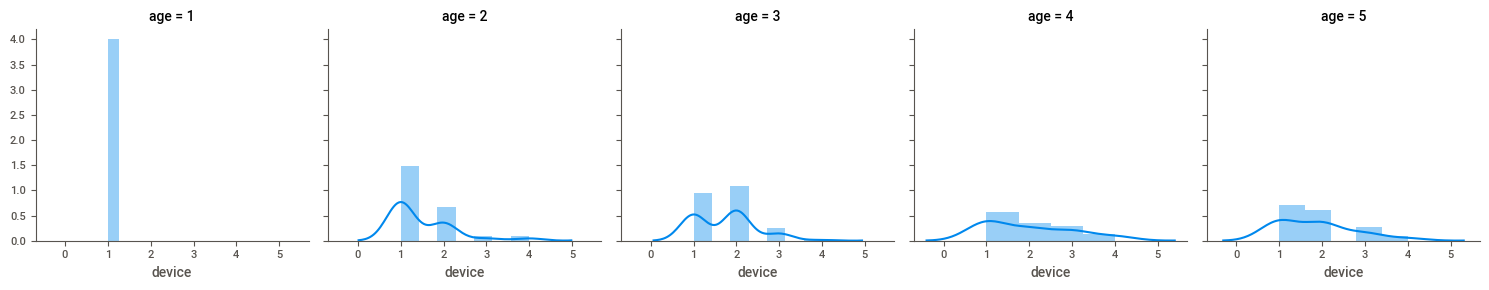

In [19]:
facet=sns.FacetGrid(df,col='age')
facet.map(sns.distplot,'device')
plt.show()

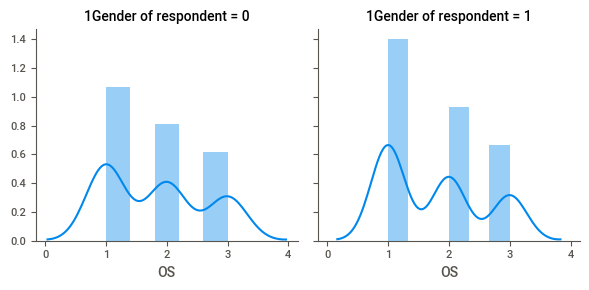

In [21]:
facet=sns.FacetGrid(df,col='1Gender of respondent')
facet.map(sns.distplot,'OS')
plt.show()

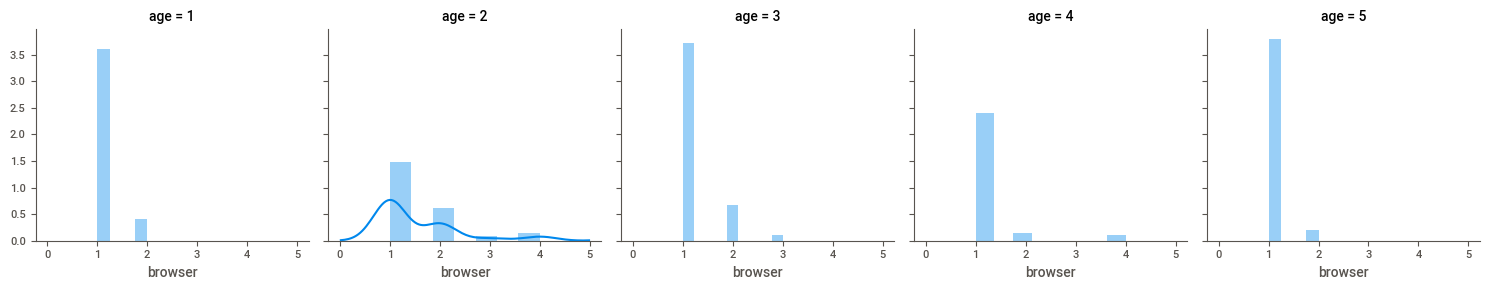

In [22]:
facet=sns.FacetGrid(df,col='age')
facet.map(sns.distplot,'browser')
plt.show()

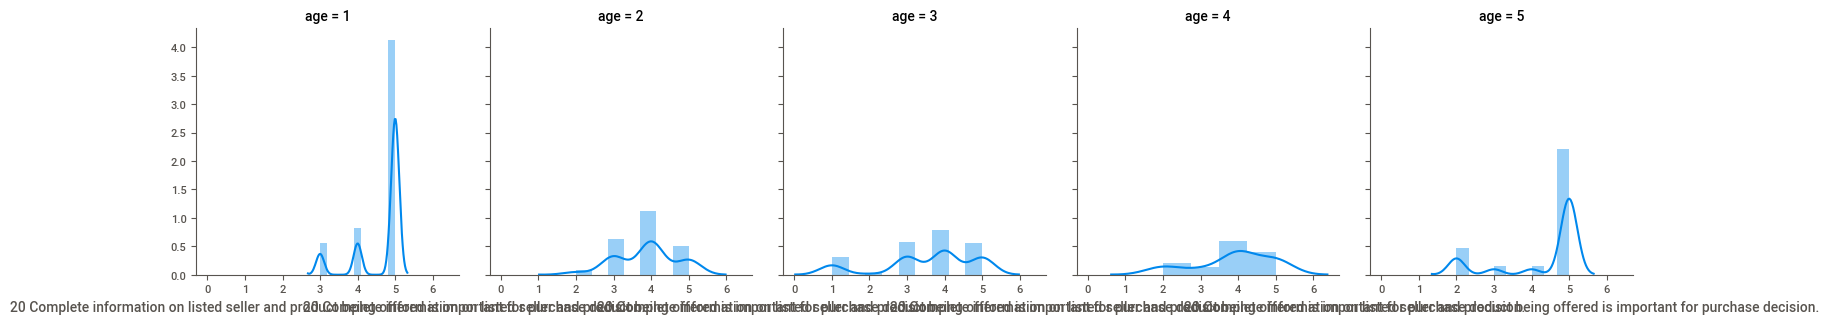

In [23]:
facet=sns.FacetGrid(df,col='age')
facet.map(sns.distplot,'20 Complete information on listed seller and product being offered is important for purchase decision.')
plt.show()

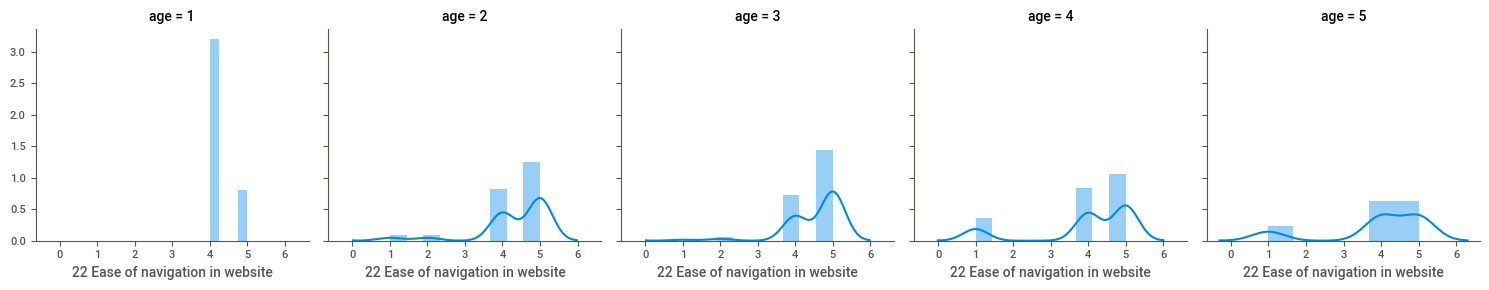

In [25]:
facet=sns.FacetGrid(df,col='age')
facet.map(sns.distplot,'22 Ease of navigation in website')
plt.show()

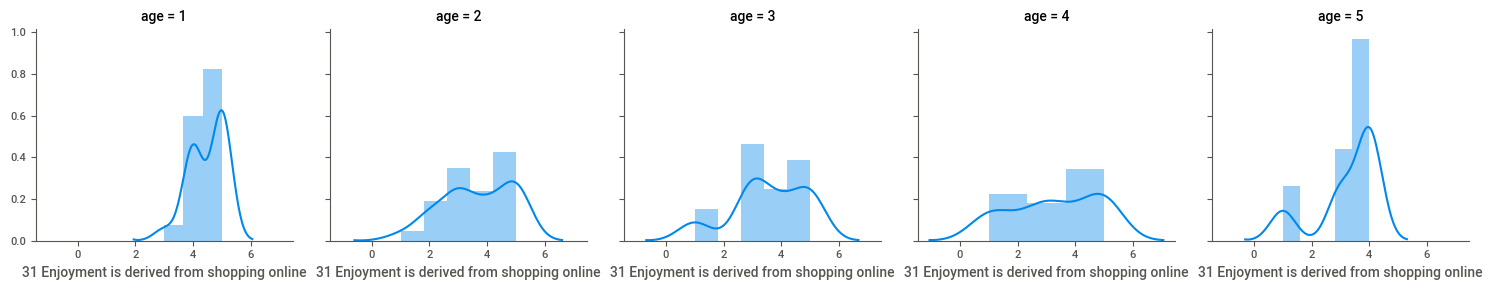

In [27]:
facet=sns.FacetGrid(df,col='age')
facet.map(sns.distplot,"31 Enjoyment is derived from shopping online")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001994D5DDBB0>,
      dtype=object)

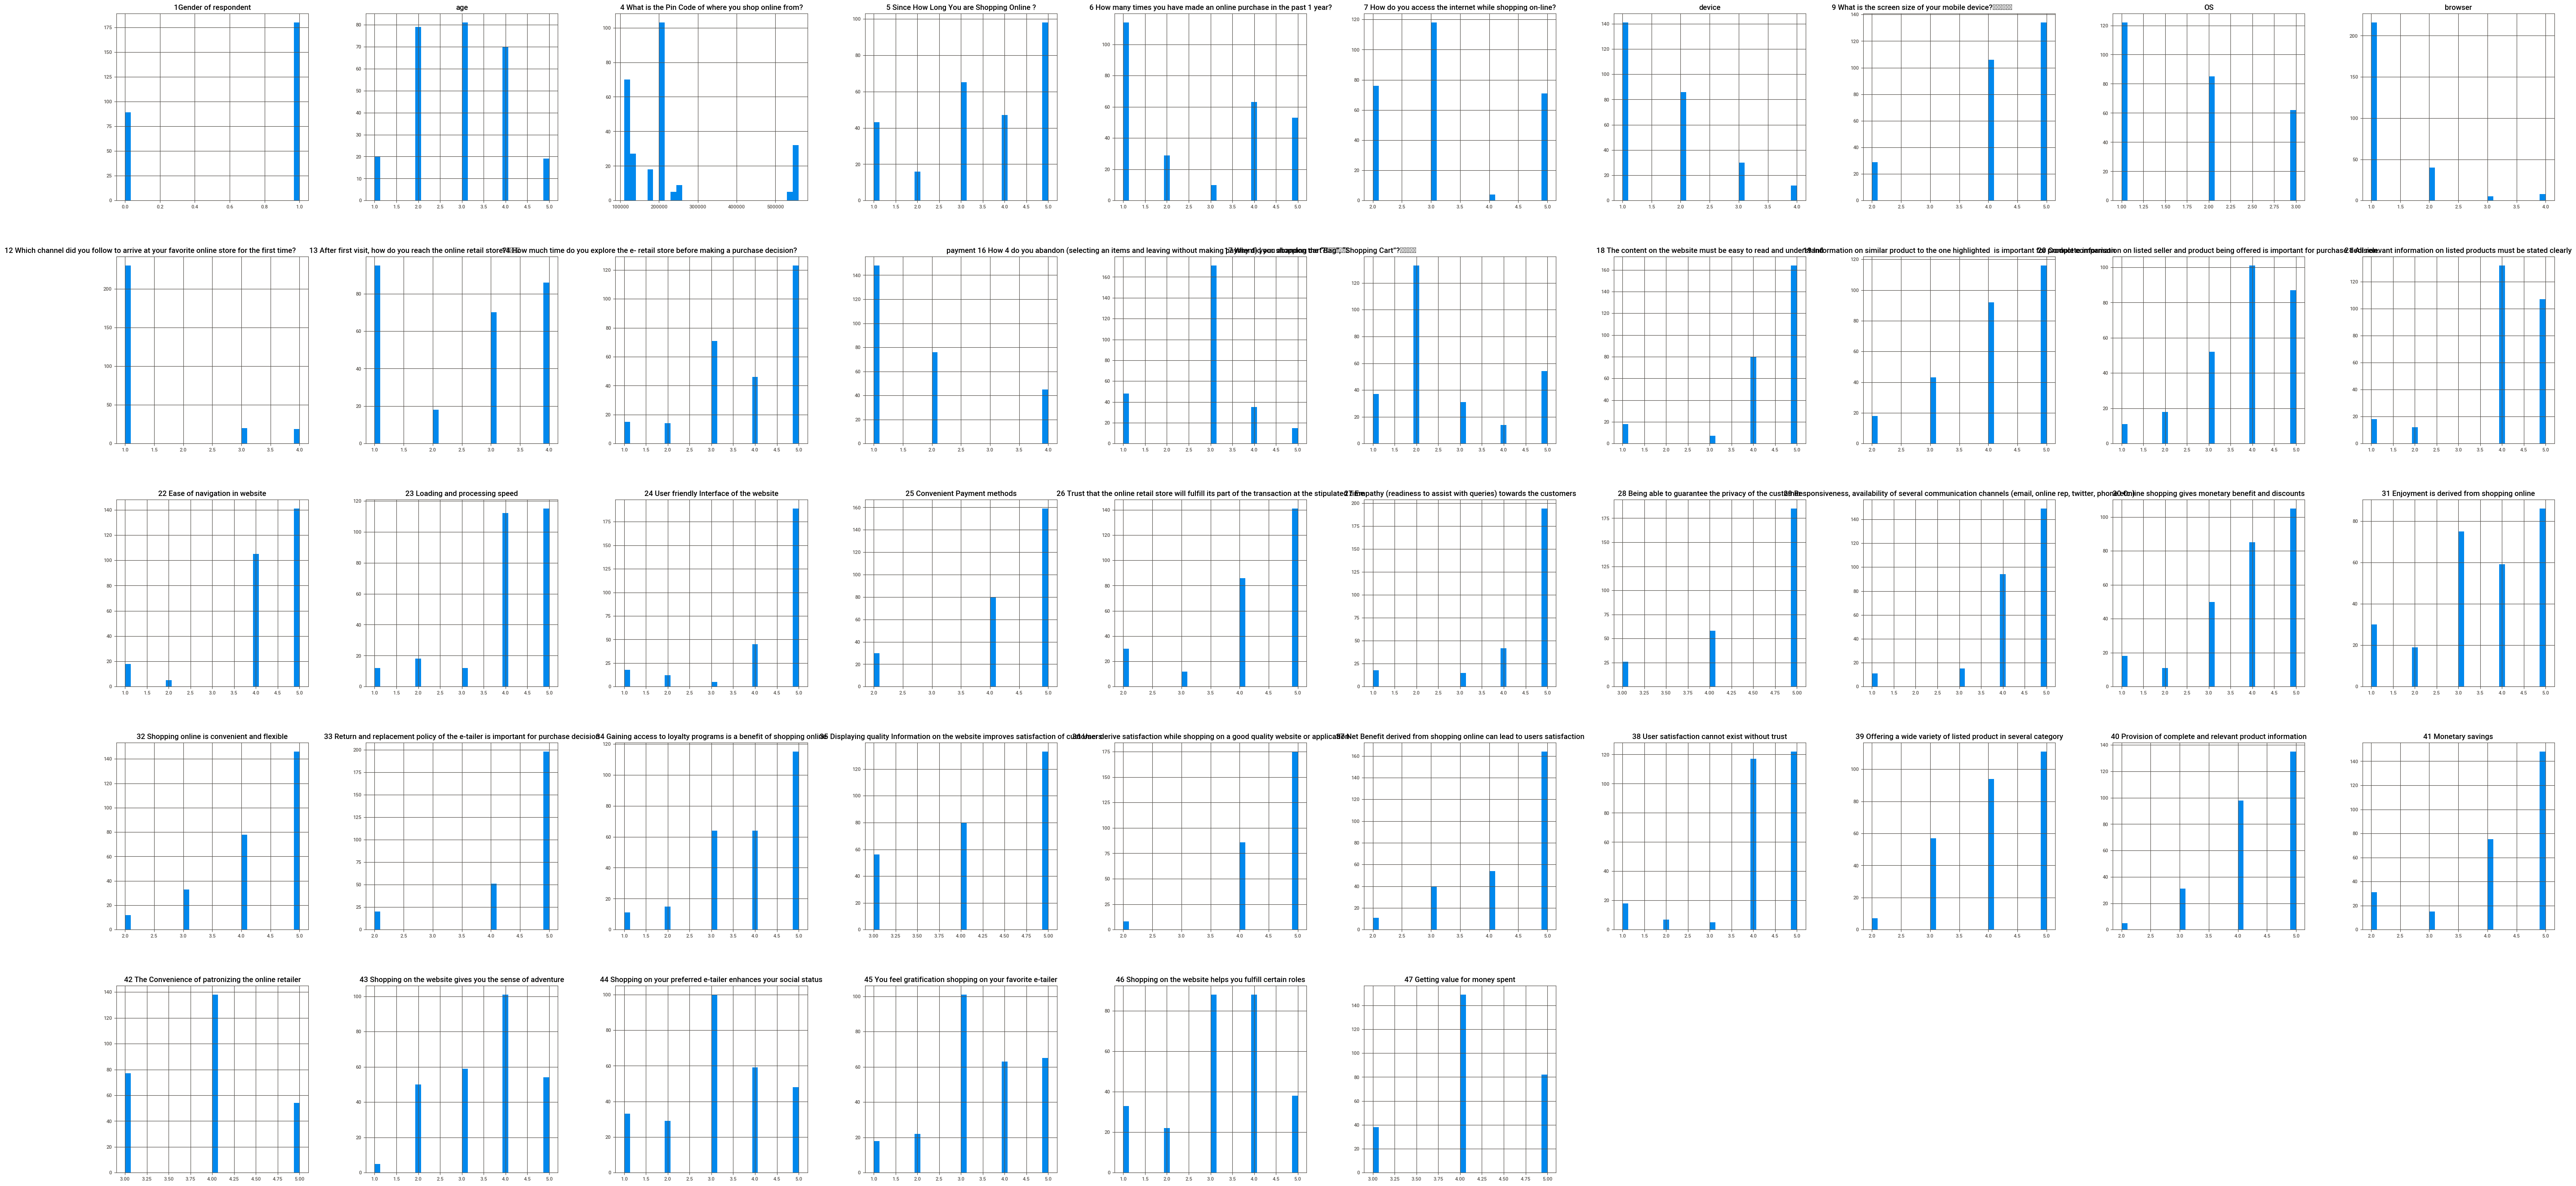

In [33]:
df.hist(figsize=(70,70), grid = True, layout = (10,10), bins = 30)

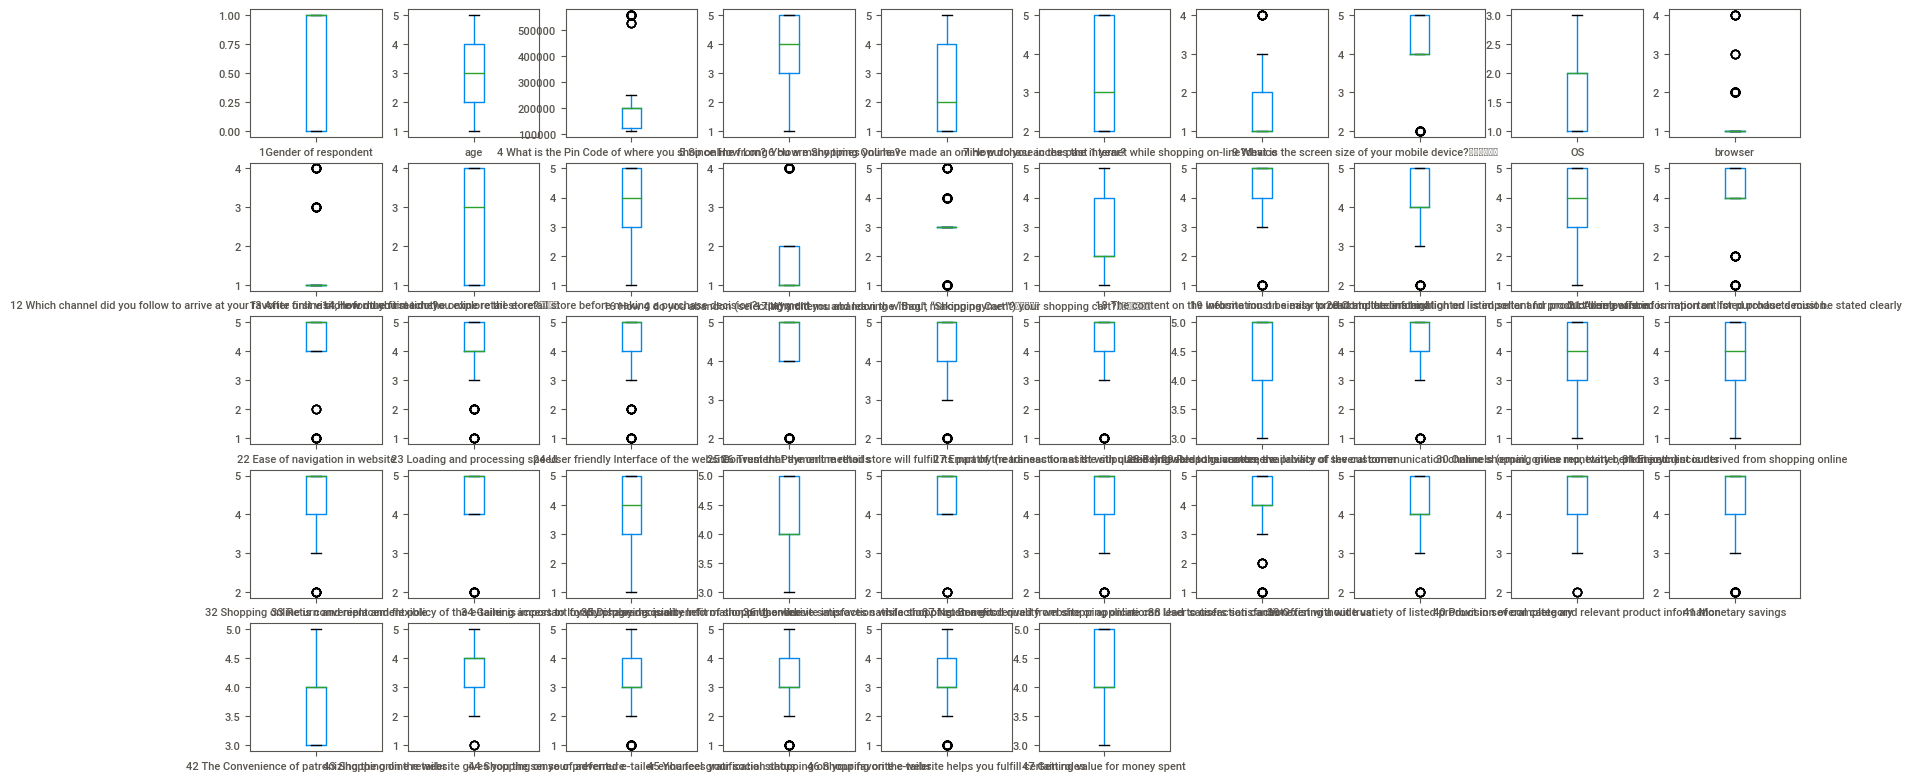

In [36]:
df.plot(kind='box', subplots=True, layout= (10,10), fontsize=8, figsize=(20,20));


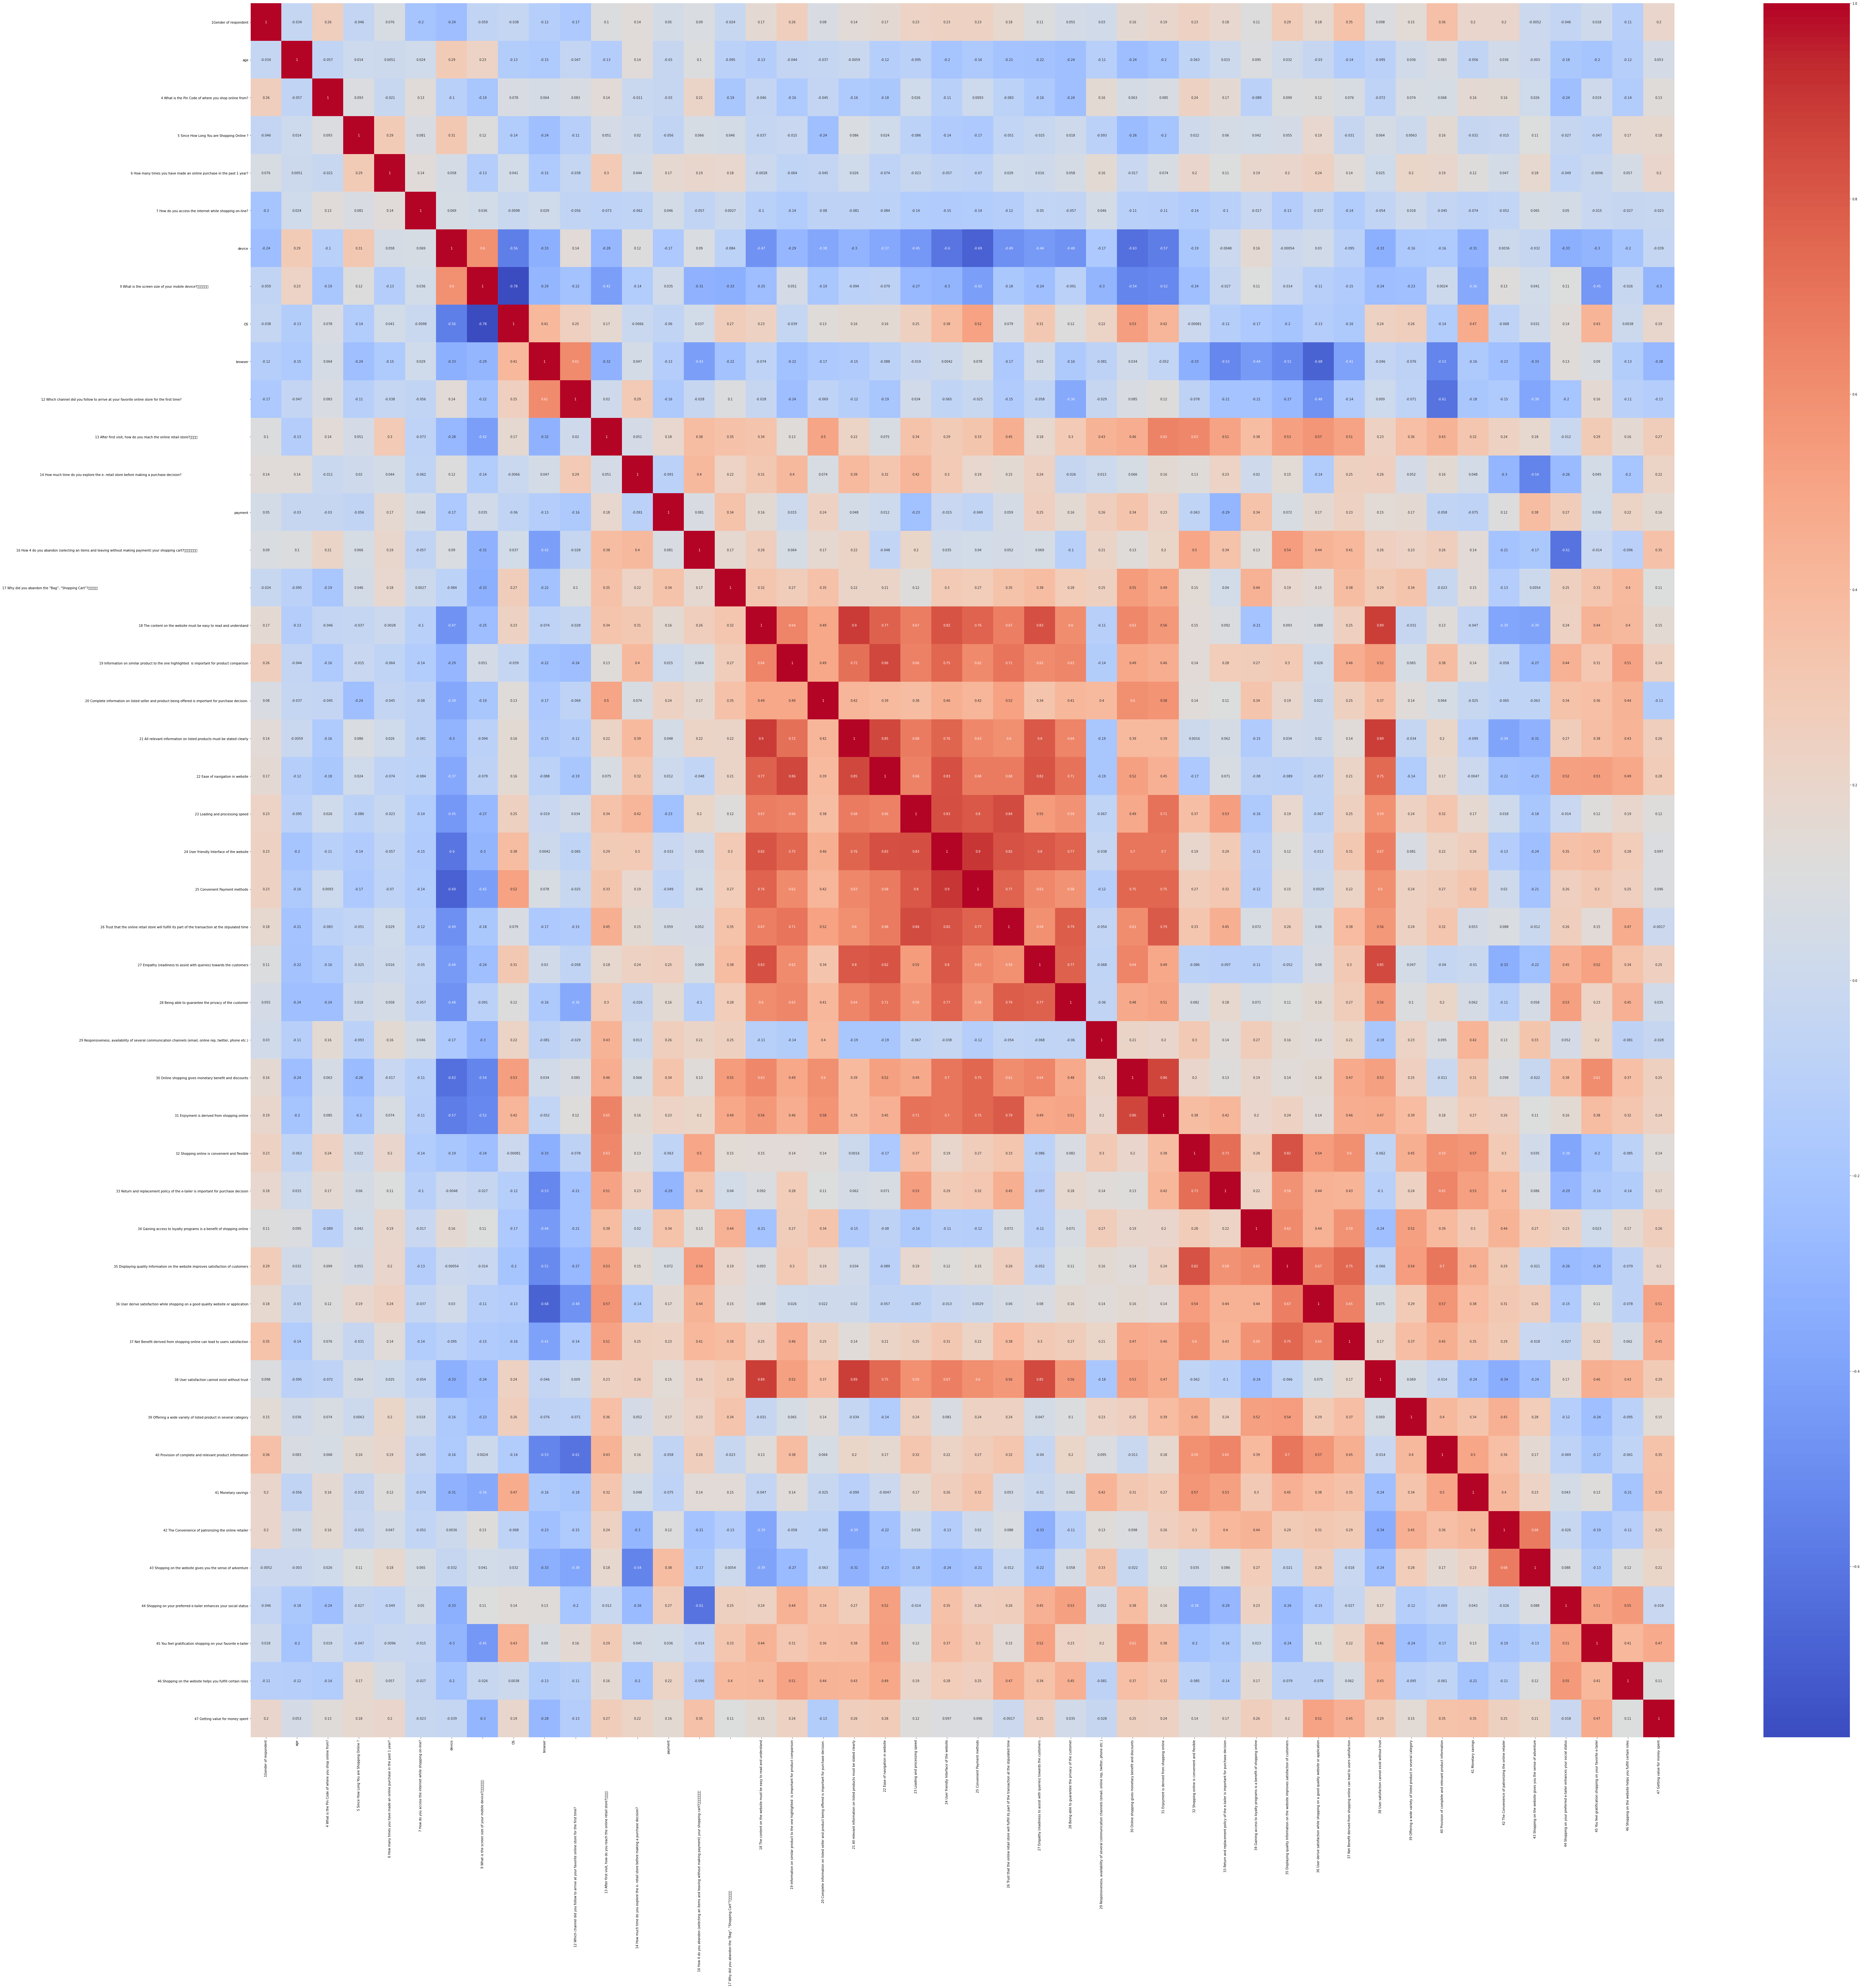

In [6]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

TypeError: unsupported operand type(s) for /: 'str' and 'int'